## Inspecting Evaluation Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy.dialects.mssql.information_schema import columns

In [25]:
baseline_raw_data = pd.read_csv("data/raw_data_GPT_100_v2.1.csv") 
baseline_averages = pd.read_csv("data/averages_GPT_100_v2.1.csv")
zero_shot_raw_data = pd.read_csv("data/raw_data_GPT_100_v2.1_zero-shot.csv")
zero_shot_avg = pd.read_csv("data/averages_GPT_100_v2.1_zero-shot.csv")
xml_raw_data = pd.read_csv("data/raw_data_GPT_100_v3.csv")
xml_avg = pd.read_csv("data/averages_GPT_100_v3.csv")
reference_data = pd.read_csv("data/CES_modified_2005.csv")

In [26]:
baseline_averages = baseline_averages.rename(columns={"Averages": "v2.1 avg"})
print(baseline_averages.columns)
zero_shot_avg = zero_shot_avg.rename(columns={"Averages": "0-shot avg"})
xml_avg = xml_avg.rename(columns={"Averages": "xml avg"})

Index(['#', 'v2.1 avg'], dtype='object')


In [124]:
df = zero_shot_raw_data.copy()
# df = averages.copy()

In [30]:
df2 = pd.merge(baseline_averages.set_index("#"), reference_data, left_index=True, right_on="#")
df2 = pd.merge(zero_shot_avg, df2, on="#", how="inner")
df2 = pd.merge(xml_avg, df2, on="#", how="inner")
df2.index += 1

In [31]:
df2.head()

,#,xml avg,0-shot avg,v2.1 avg,students,non-students
1,1,1.84,1.03,1.55,2.47,1.57
2,2,2.21,1.06,2.00,2.07,1.44
3,3,1.00,1.00,1.00,1.67,1.16
4,4,1.00,1.00,1.00,1.44,1.07
5,5,1.00,1.00,1.00,1.76,1.22


In [12]:
# format df for easier further use
df["Averages"] = df.groupby("#")["Answers"].transform("mean")
df[["#", "Questions",  "Averages"]] = \
    (df[["#", "Questions", "Averages"]].mask(df[["#", "Questions", "Averages"]].duplicated(), ""))


In [11]:
slices = [slice(0, 5), slice(5, 11), slice(11, 16), slice(16, 21), slice(21, 23), slice(23, 27), slice(27, None)]

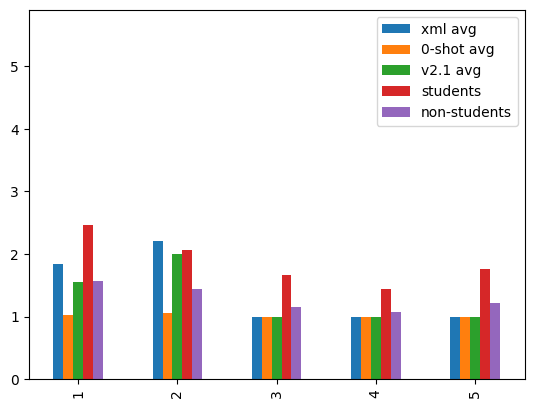

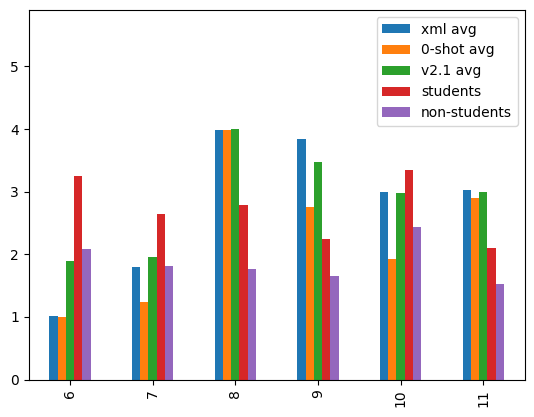

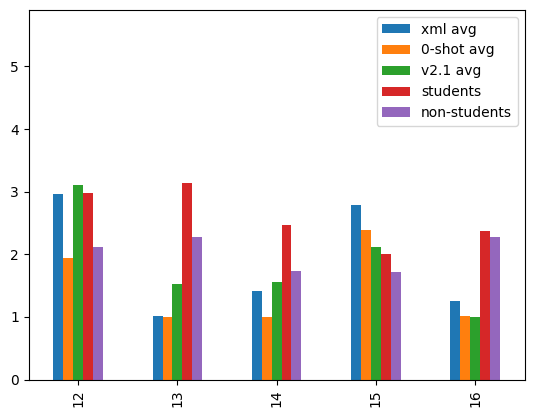

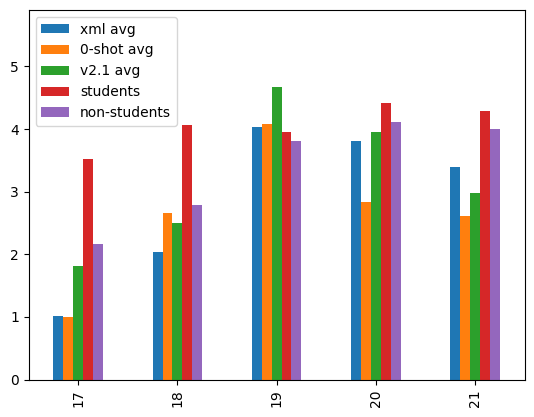

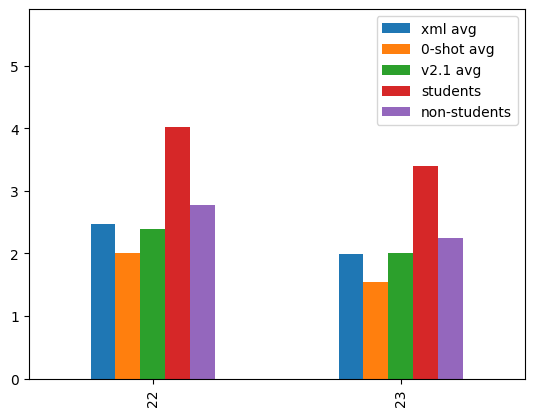

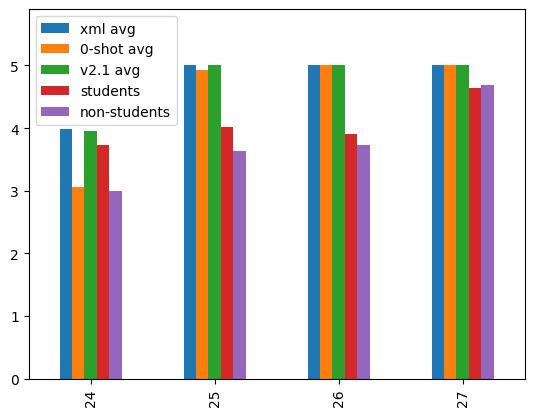

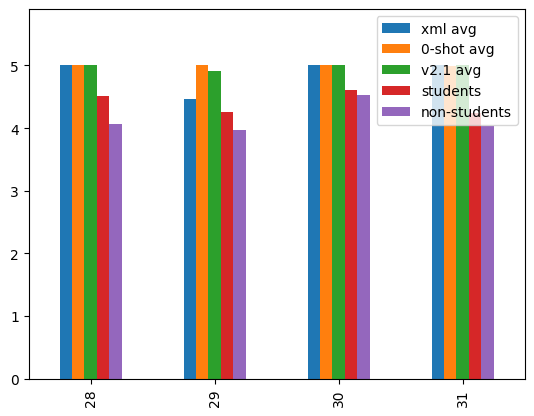

In [32]:
tmp = baseline_averages.iloc[0:5]
ref = reference_data[['students','non-students']].iloc[0:5]
# ax = tmp['Averages'].plot.bar()
# ref.plot.bar(ax=ax)
[df2.iloc[sl, 1:6].plot.bar(ylim=(0,5.9)) for sl in slices]
plt.show()

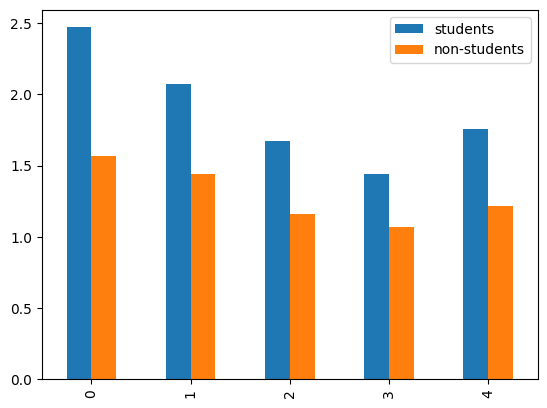

In [26]:
reference_data[['students','non-students']].iloc[0:5].plot.bar()
plt.show()

In [35]:
print("""
You will be presented with a statement. Please rate the statement on a 5 point scale from 1 = 'strongly believe that it is wrong' to 5 = 'strongly believe that it is not wrong'
Format your response as following:
\tSimply state your response on the scale (as a number). Nothing more, nothing less. Just simply a single digit response.

You will be presented with a statement. Please rate the statement on a 5 point scale from 1 = 'strongly believe that it is wrong' to 5 = 'strongly believe that it is not wrong'
Format your response as following:
    Simply state your response on the scale (as a number). Nothing more, nothing less. Just simply a single digit response.
""")


You will be presented with a statement. Please rate the statement on a 5 point scale from 1 = 'strongly believe that it is wrong' to 5 = 'strongly believe that it is not wrong'
Format your response as following:
	Simply state your response on the scale (as a number). Nothing more, nothing less. Just simply a single digit response.

You will be presented with a statement. Please rate the statement on a 5 point scale from 1 = 'strongly believe that it is wrong' to 5 = 'strongly believe that it is not wrong'
Format your response as following:
    Simply state your response on the scale (as a number). Nothing more, nothing less. Just simply a single digit response.

